In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time.csv


In [ ]:
dt=pd.read_csv('delivery_time.csv')
dt


,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
#eda
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
dt['Delivery Time'].unique()

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

In [ ]:
dt['Sorting Time'].unique()

array([10,  4,  6,  9,  7,  3,  8,  2,  5])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


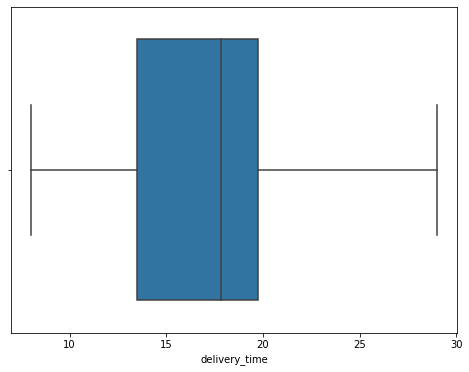

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


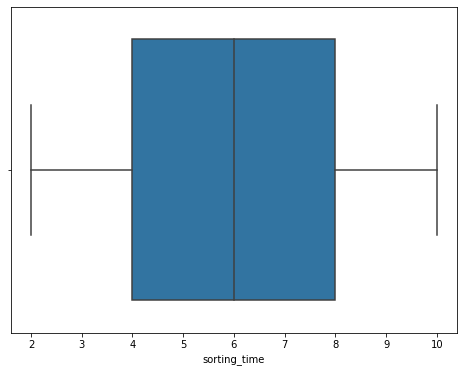

In [ ]:
# Renaming Columns
data=dt.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)

# Checking for outliers with help of boxplot
plt.figure(figsize = (8, 6))
plt.tight_layout()
sns.boxplot(data.delivery_time)
plt.show()

plt.figure(figsize = (8, 6))
plt.tight_layout()
sns.boxplot(data.sorting_time)
plt.show()

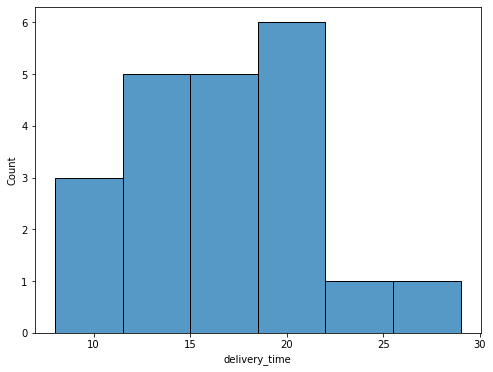

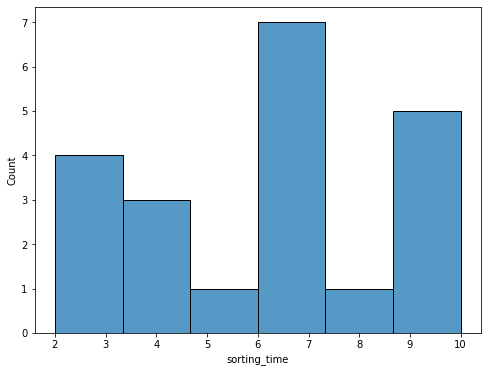

In [ ]:
# Checking for outliers with help of boxplot
plt.figure(figsize = (8, 6))
plt.tight_layout()
sns.histplot(data.delivery_time)
plt.show()

plt.figure(figsize = (8, 6))
plt.tight_layout()
sns.histplot(data.sorting_time)
plt.show()

from the above boxplots and histogram we can state that there are no outliers in the dataset

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


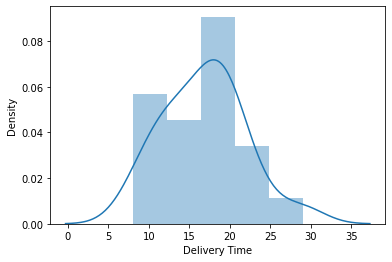

In [ ]:
sns.distplot(dt['Delivery Time'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


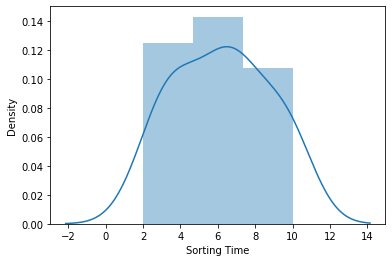

In [ ]:
sns.distplot(dt['Sorting Time'])

In [ ]:
#feature engineering
dt.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1,inplace=True)

In [ ]:
dt

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
#correlation
dt.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


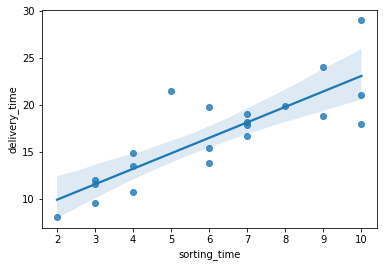

In [ ]:
#best fit line using .regplot()
sns.regplot(x='sorting_time',y='delivery_time',data=dt)


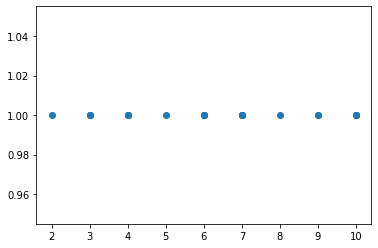

In [ ]:
plt.scatter(data.sorting_time,data.delivery_time==data.delivery_time)
plt.show()

In [ ]:
#log transformation
log=np.log(data.sorting_time)
log

0     2.302585
1     1.386294
2     1.791759
3     2.197225
4     2.302585
5     1.791759
6     1.945910
7     1.098612
8     2.302585
9     2.197225
10    2.079442
11    1.386294
12    1.945910
13    1.098612
14    1.098612
15    1.386294
16    1.791759
17    1.945910
18    0.693147
19    1.945910
20    1.609438
Name: sorting_time, dtype: float64

In [ ]:
model=smf.ols('delivery_time~log',data=dt).fit()
model

In [ ]:
#testing the model
#finding coeeficient parameters
model.params

Intercept    1.159684
log          9.043413
dtype: float64

In [ ]:
model.pvalues

Intercept    0.641980
log          0.000003
dtype: float64

In [ ]:
model.rsquared

0.6954434611324223

In [ ]:
#square transformations
sq=np.square(data.sorting_time)
sq

0     100
1      16
2      36
3      81
4     100
5      36
6      49
7       9
8     100
9      81
10     64
11     16
12     49
13      9
14      9
15     16
16     36
17     49
18      4
19     49
20     25
Name: sorting_time, dtype: int64

In [ ]:
model1=smf.ols('delivery_time~sq',data=dt).fit()
model1

In [ ]:
model1.params

Intercept    11.237205
sq            0.124870
dtype: float64

In [ ]:
model1.pvalues

Intercept    1.415704e-08
sq           1.739194e-05
dtype: float64

In [ ]:
model1.rsquared

0.6302871815826637

In [ ]:
#square root transformation
sq1=np.sqrt(data.sorting_time)
sq1

0     3.162278
1     2.000000
2     2.449490
3     3.000000
4     3.162278
5     2.449490
6     2.645751
7     1.732051
8     3.162278
9     3.000000
10    2.828427
11    2.000000
12    2.645751
13    1.732051
14    1.732051
15    2.000000
16    2.449490
17    2.645751
18    1.414214
19    2.645751
20    2.236068
Name: sorting_time, dtype: float64

In [ ]:
model2=smf.ols('delivery_time~sq1',data=dt).fit()
model1

In [ ]:
model2.params

Intercept   -2.518837
sq1          7.936591
dtype: float64

In [ ]:
model2.pvalues

Intercept    0.410857
sq1          0.000003
dtype: float64

In [ ]:
model2.rsquared

0.695806227630867

In [ ]:
#cube root transformation
cube=np.cbrt(data.sorting_time)
cube

0     2.154435
1     1.587401
2     1.817121
3     2.080084
4     2.154435
5     1.817121
6     1.912931
7     1.442250
8     2.154435
9     2.080084
10    2.000000
11    1.587401
12    1.912931
13    1.442250
14    1.442250
15    1.587401
16    1.817121
17    1.912931
18    1.259921
19    1.912931
20    1.709976
Name: sorting_time, dtype: float64

In [ ]:
model3=smf.ols('delivery_time~cube',data=dt).fit()
model3

In [ ]:
model3.params

Intercept   -11.579201
cube         15.767284
dtype: float64

In [ ]:
model3.pvalues

Intercept    0.015048
cube         0.000002
dtype: float64

In [ ]:
model3.rsquared

0.6974182292354245

In [ ]:
#creating model
model=smf.ols('delivery_time~sorting_time',data=dt).fit()
model

In [ ]:
#testing the model
#finding coeeficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [ ]:
#pvalues
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [ ]:
#rsquared
model.rsquared

0.6822714748417231

In [ ]:
#model predictions
dt['pred']=model.fittedvalues
dt

,delivery_time,sorting_time,pred
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


In [ ]:
#manual predictions
dt['pred1']=6.582734+(1.649020*dt['sorting_time'])
dt

,delivery_time,sorting_time,pred,pred1
0,21.00,10,23.072934,23.072934
1,13.50,4,13.178814,13.178814
2,19.75,6,16.476854,16.476854
3,24.00,9,21.423914,21.423914
4,29.00,10,23.072934,23.072934
5,15.35,6,16.476854,16.476854
6,19.00,7,18.125874,18.125874
7,9.50,3,11.529794,11.529794
8,17.90,10,23.072934,23.072934
9,18.75,9,21.423914,21.423914
